In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [13]:
hexa = pd.read_csv('FeedForward_Data_hexa.csv', names=['dim1','dim2','label'])

In [14]:

        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and add padding as required
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = clf(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

In [15]:
X_hexa = hexa.values[:, 0:2]  # Take only the first two features.     
X_hexa = torch.tensor(X_hexa, dtype = torch.float)   
y_hexa = hexa.values[:, 2]
y_hexa = torch.tensor(y_hexa, dtype = torch.long)

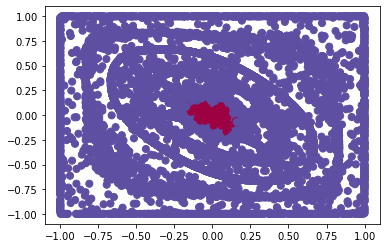

In [16]:
plt.scatter(X_hexa[:, 0], X_hexa[:, 1], c=y_hexa, cmap=plt.cm.Spectral, s = 50)

In [17]:
class Net_a(nn.Module):
    
    def __init__(self):
        super(Net_a, self).__init__()
        self.fc1 = nn.Linear(2, 15)
        torch.nn.init.uniform_(self.fc1.weight, a=-2, b=2)
        
        self.fc2 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc2.weight, a=-2, b=2)
        
        self.fc3 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc3.weight, a=-2, b=2)
        
        self.fc4 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc4.weight, a=-2, b=2)
        
        self.fc5 = nn.Linear(15, 15)
        torch.nn.init.uniform_(self.fc5.weight, a=-2, b=2)
        
        self.fc6 = nn.Linear(15, 2)
        torch.nn.init.uniform_(self.fc6.weight, a=-2, b=2)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

In [18]:
previous_loss = 1

#%% train
net_a = Net_a()

# create a stochastic gradient descent optimizer
learning_rate = .02
optimizer = torch.optim.SGD(net_a.parameters(), lr=learning_rate, momentum=0.9)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

#Stopping conditions
stopping_crit = np.power(1/10,6)
nepochs = 20000

data, target = X_hexa, y_hexa
for epoch in range(nepochs):

    optimizer.zero_grad()
    # forward propagate
    net_out = net_a(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net_a(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if accuracy >= 0.97:
            break
    
    if abs(previous_loss - loss.item()) < stopping_crit:
        break
    
    previous_loss = copy.copy(loss.item())
    
#%% compute accuracy on training data
net_out = net_a(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

<ipython-input-17-732c73c9d00f>:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  20.884859085083008
Training accuracy is  0.9405799278846154
Epoch  100 Loss  0.1759939044713974
Training accuracy is  0.9405799278846154
Epoch  200 Loss  0.16694723069667816
Training accuracy is  0.9405799278846154
Epoch  300 Loss  0.15456463396549225
Training accuracy is  0.9405799278846154
Epoch  400 Loss  0.1535159796476364
Training accuracy is  0.9405799278846154
Epoch  500 Loss  0.1627575308084488
Training accuracy is  0.9405799278846154
Epoch  600 Loss  0.15054650604724884
Training accuracy is  0.9405799278846154
Epoch  700 Loss  0.1530572474002838
Training accuracy is  0.9405799278846154
Epoch  800 Loss  0.1507023274898529
Training accuracy is  0.9405799278846154
Epoch  900 Loss  0.14822515845298767
Training accuracy is  0.9405799278846154
Epoch  1000 Loss  0.14909633994102478
Training accuracy is  0.9405799278846154
Epoch  1100 Loss  0.15268570184707642
Training accuracy is  0.9405799278846154
Epoch  1200 Loss  0.15150310099124908
Training accuracy is  0.94057992

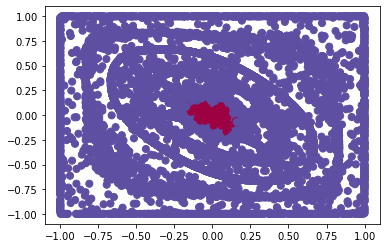

In [23]:
plt.scatter(X_hexa[:, 0], X_hexa[:, 1], c=correctidx, cmap=plt.cm.Spectral, s = 50)

In [24]:
print(net_a.fc1.weight)
print(net_a.fc2.weight)
print(net_a.fc3.weight)
print(net_a.fc4.weight)
print(net_a.fc5.weight)
print(net_a.fc6.weight)

Parameter containing:
tensor([[-2.8134, -0.7431],
        [-0.1400,  0.9087],
        [-1.2149, -1.5947],
        [ 3.3212,  1.7490],
        [-1.0918, -0.4240],
        [-1.6043,  0.0996],
        [ 1.1494, -1.4486],
        [ 1.4607,  1.6781],
        [-0.2465, -2.2784],
        [ 0.2960, -0.5395],
        [-0.2849,  1.5937],
        [-1.3693,  1.4347],
        [-0.9270, -0.2310],
        [-0.9668,  0.0320],
        [ 0.9443, -0.9196]], requires_grad=True)
Parameter containing:
tensor([[-0.3258,  0.6418, -0.4129,  0.2181, -0.9987, -1.8935, -1.4370,  1.3377,
         -0.2427,  0.8839, -0.0413, -1.9882,  1.5102,  0.4049, -1.7717],
        [-1.4635, -1.9229,  0.3100, -0.7933,  1.8278, -0.5095,  1.5423,  0.2787,
         -1.8755, -1.3205, -0.1961, -0.5270,  1.1449, -0.7772, -1.6659],
        [-1.7951, -0.1731, -1.5055, -1.9075,  0.9809, -0.6134, -3.1843,  0.4802,
          0.0482, -1.0638,  1.1587,  0.1352, -0.2615, -1.3792, -1.0573],
        [ 1.2697, -1.3275,  0.6771,  2.1575, -1.0979,